In [9]:
from cvxpy import *
import numpy as np
import networkx as nx
import scipy.linalg as sla
import mosek
import matplotlib.pyplot as plt
%precision %.2f
np.set_printoptions(precision=2)

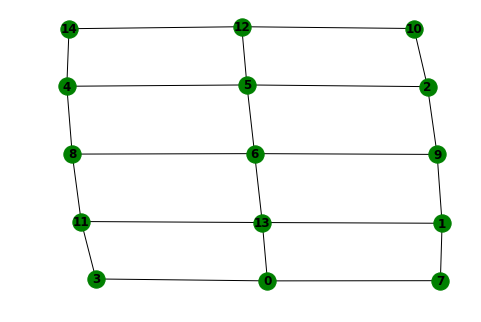

In [16]:
# networks Set up 
# Create Graph Object
rowSize = 3; colSize = 5;

G = nx.grid_graph([rowSize,colSize])
e = G.number_of_edges();
v = G.number_of_nodes();


# --------Source Vector set up ----------------#
sourceNode = 14; 
sinkNode = 7;
sourceVec = np.zeros((v));
sourceVec[sourceNode] = -1;
sourceVec[sinkNode] = 1;

#---------Draw Graph---------#
G = nx.convert_node_labels_to_integers(G)
nx.draw(G, node_color='g', edge_color='k', with_labels=True, font_weight='bold')
edgeList = list(G.edges);

In [11]:
def generateMDP(S,A):
    """
    Generates a random MDP with finite sets X and U such that |X|=S and |U|=A.
    
    Parameters
    ----------
    S : int
        Cardinality of state space.
    A : int
        Cardinality of input space.
        
    Returns
    -------
    P : (S,S,A) array
        Transition probability tensor such that ``P[i,j,k]=prob(x_next=i | x_now=j, u_now=k)``.
    c : (S,A) array
        Cost such that ``c[i,j]=cost(x_now=i,u_now=j)``.
    """
    P, c = np.zeros((S,S,A)), np.random.uniform(size=(S,A))
    for j in range(S):
        for k in range(A):
            P[:,j,k] = np.random.uniform(size=S)
            P[:,j,k] /= np.sum(P[:,j,k])
    return P, c

In [38]:
states = 5; actions = 3;
P,c = generateMDP(S=states,A=actions);


In [74]:
# Construct the problem.
#----------------MDP Routing Game--------------------
mass = 10.0;
initP = sourceVec*mass;
time = 10;
R = np.zeros((time, states, actions))
# Construct the time dependent reward
for t in range(0,time):
    R[t,:,:] = c;

# y = Variable(time,states,actions);

# mdpPot = R[0,:,:].dot(y[0,i,i]);
# x is 3D array with dimensions p x q x r.
y = {};
for i in range(time):
    y[i] = Variable(states, actions);
mdpObj = Minimize(sum([trace(c.T*y[i]) for i in range(time)]))
mdpConstraints = [0 <= y]
for i in range(time):
    mdpConstraints = mdpConstraints + [sum(y[i][:,i]) <= ]
mdpPolicy = Problem(mdpObj)
mdpRes = mdpPolicy.solve(solver=MOSEK)

NameError: name 'RouteMat' is not defined